# Import Libraries

In [60]:
# Basic Libraries
import pandas as pd
import numpy as np
import os
import time
import logging
import datetime
import warnings
import sys
warnings.filterwarnings('ignore')

#  Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from sklearn.impute import KNNImputer

# Imbalance libraries
from imblearn.over_sampling import SMOTE

# Model selection and metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, ParameterGrid


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

#  Modeling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

sys.path.insert(0, root_dir)

from config import *
from preprocessing import preprocess

# Show all columns
pd.set_option('display.max_columns', None)


logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create a handler to print logs in the notebook
handler = logging.StreamHandler()
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [2]:
raw_df = pd.read_csv(RAW_DATA_PATH)
print(f"Shape of data: {raw_df.shape}")

Shape of data: (12316, 32)


In [3]:
# Inspect head
raw_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
# Inspect tail
raw_df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


# Exploratory Data Analysis

In [5]:
raw_df.shape

(12316, 32)

In [6]:
raw_df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rename columns of a dataframe.

    Parameters
    ----------
    raw_raw_df: pd.DataFrame
        The dataframe to rename the columns of.

    Returns
    -------
    raw_raw_df: pd.DataFrame
        The dataframe with renamed columns.
    """

    # Rename columns
    col_map={
        'Time': 'time',
        'Day_of_week': 'day_of_week',
        'Age_band_of_driver': 'driver_age',
        'Sex_of_driver': 'driver_sex',
        'Educational_level': 'educational_level',
        'Vehicle_driver_relation': 'vehicle_driver_relation',
        'Driving_experience': 'driving_experience',
        'Type_of_vehicle': 'vehicle_type',
        'Owner_of_vehicle': 'vehicle_owner',
        'Service_year_of_vehicle': 'service_year',
        'Defect_of_vehicle': 'vehicle_defect',
        'Area_accident_occured': 'accident_area',
        'Lanes_or_Medians': 'lanes',
        'Road_allignment': 'road_allignment',
        'Types_of_Junction': 'junction_type',
        'Road_surface_type': 'surface_type',
        'Road_surface_conditions': 'road_surface_conditions',
        'Light_conditions': 'light_condition',
        'Weather_conditions': 'weather_condition',
        'Type_of_collision': 'collision_type',
        'Number_of_vehicles_involved': 'vehicles_involved',
        'Number_of_casualties': 'casualties',
        'Vehicle_movement': 'vehicle_movement',
        'Casualty_class': 'casualty_class',
        'Sex_of_casualty': 'casualty_sex' , 
        'Age_band_of_casualty': 'casualty_age', 
        'Casualty_severity': 'casualty_severity',
        'Work_of_casuality': 'casualty_work', 
        'Fitness_of_casuality': 'casualty_fitness',
        'Pedestrian_movement': 'pedestrian_movement',
        'Cause_of_accident': 'accident_cause',
        'Accident_severity': 'accident_severity'
    }

    df.rename(columns=col_map, inplace=True)

    return df

In [8]:
raw_df = rename_columns(raw_df)

In [9]:
raw_df.head()

,time,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [11]:
raw_df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [12]:
raw_df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


In [13]:
raw_df.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [14]:
print(f"Number of duplicates: {raw_df.duplicated().sum()}")

Number of duplicates: 0


In [15]:
print("Unique Values per Column:")
raw_df.nunique()

Unique Values per Column:


time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [16]:
for i in raw_df.columns:
    print(f"Unique value in {i}:")
    print(raw_df[i].unique(),'\n')

Unique value in time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique value in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique value in educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Unique value

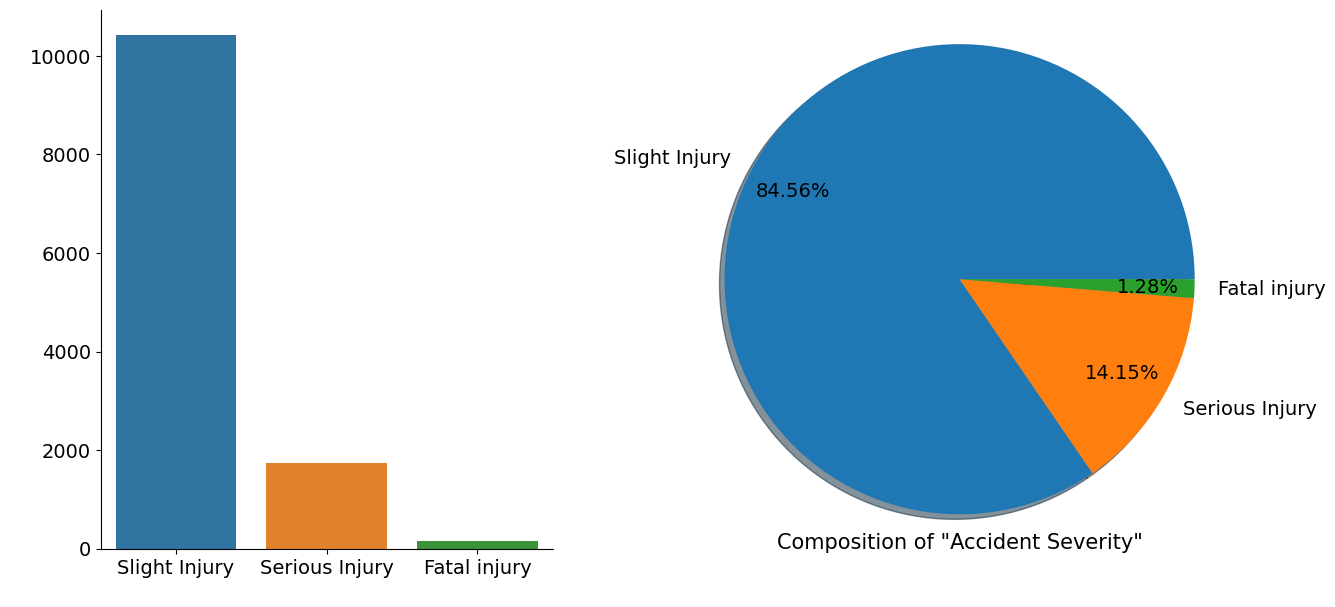

In [17]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=raw_df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(raw_df["accident_severity"].value_counts(),
        labels=list(raw_df["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [18]:
fig = px.treemap(raw_df, path=['accident_cause'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

py.init_notebook_mode(connected=True)
py.iplot(fig,filename= "treemap")

In [19]:
# converting 'time' to datetime
raw_df['time'] = pd.to_datetime(raw_df['time'])

# date (day-month-year) time
raw_df["time"].dt.hour

# extracting hour and minute from timestamp
raw_df['hour'] = raw_df['time'].dt.hour
raw_df['minute'] = raw_df['time'].dt.minute
raw_df.drop('time', axis=1, inplace=True)

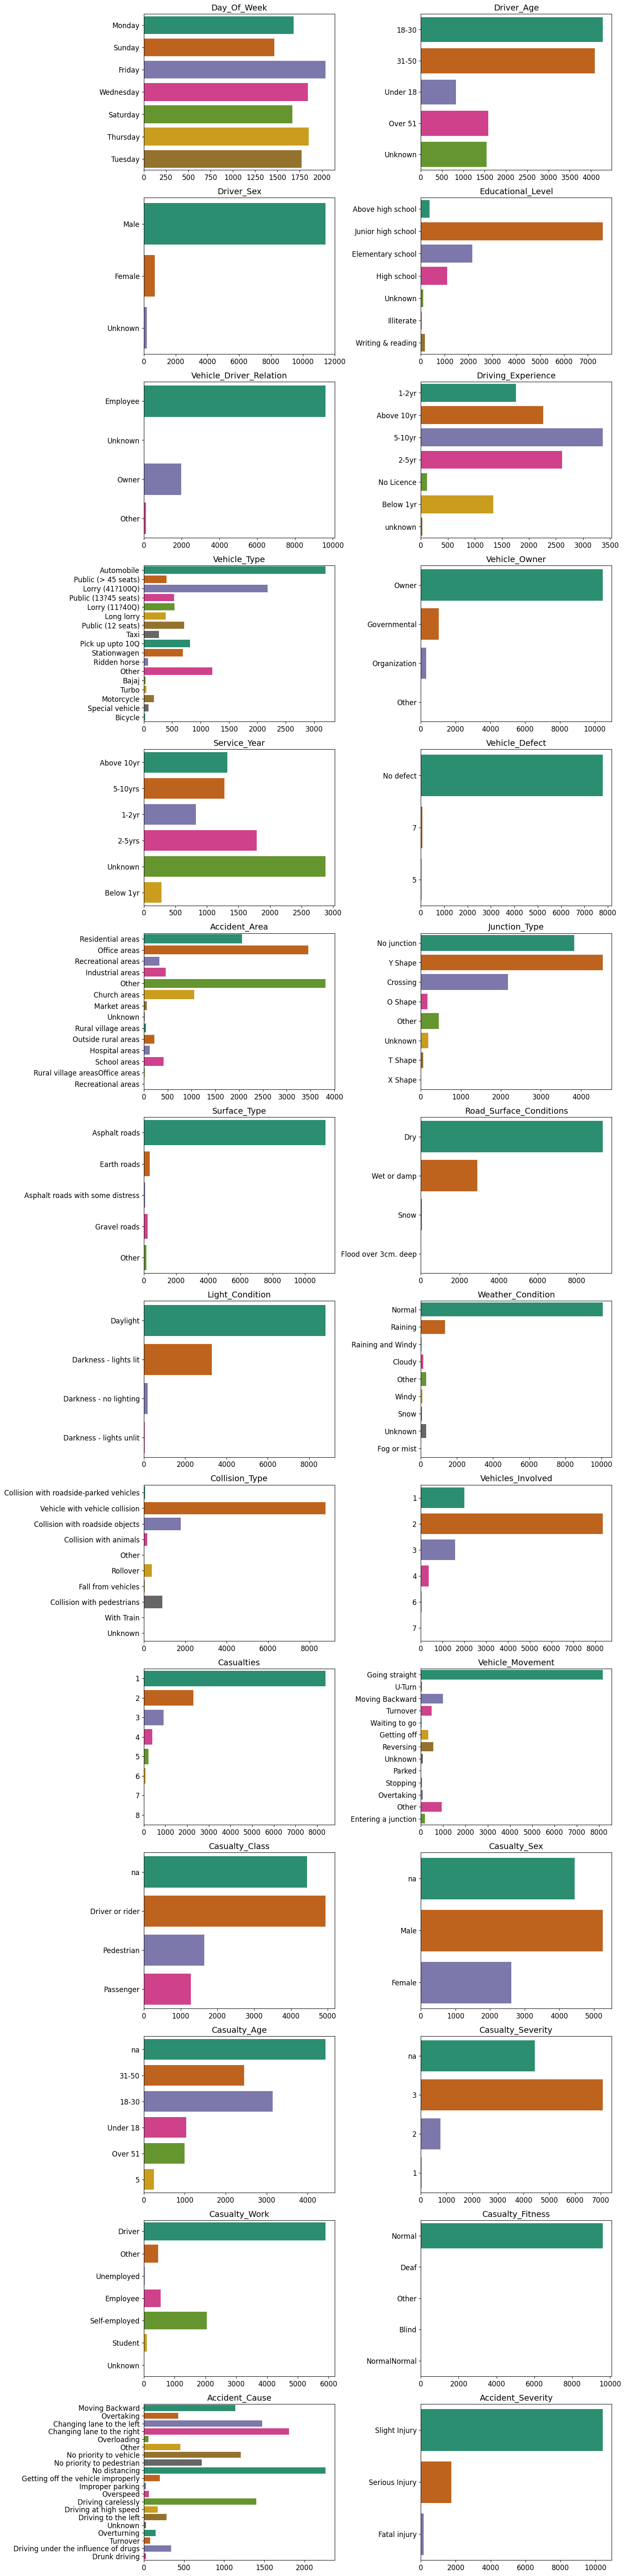

In [20]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in raw_df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= raw_df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=raw_df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

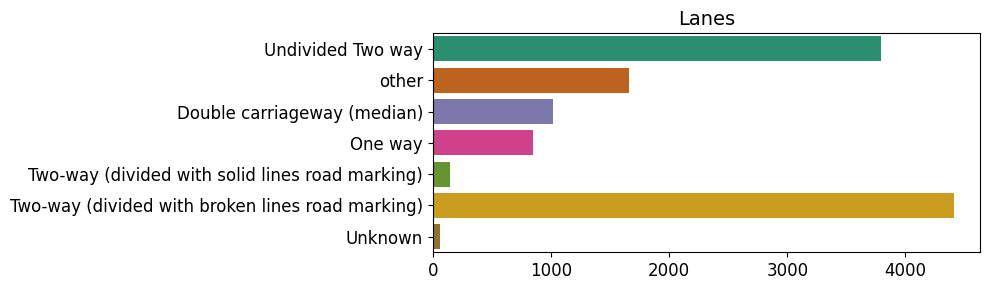

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=raw_df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

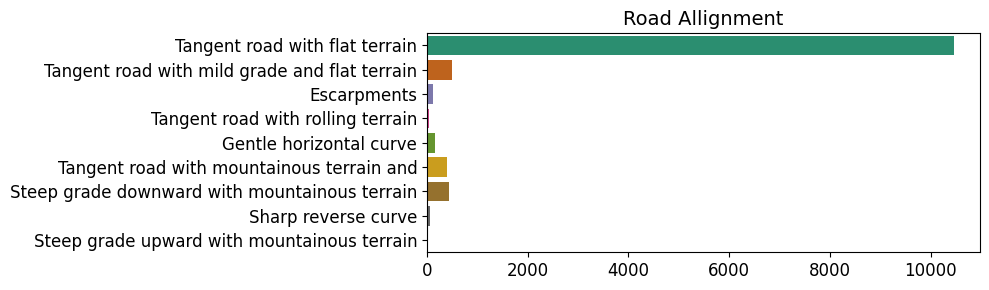

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(data=raw_df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

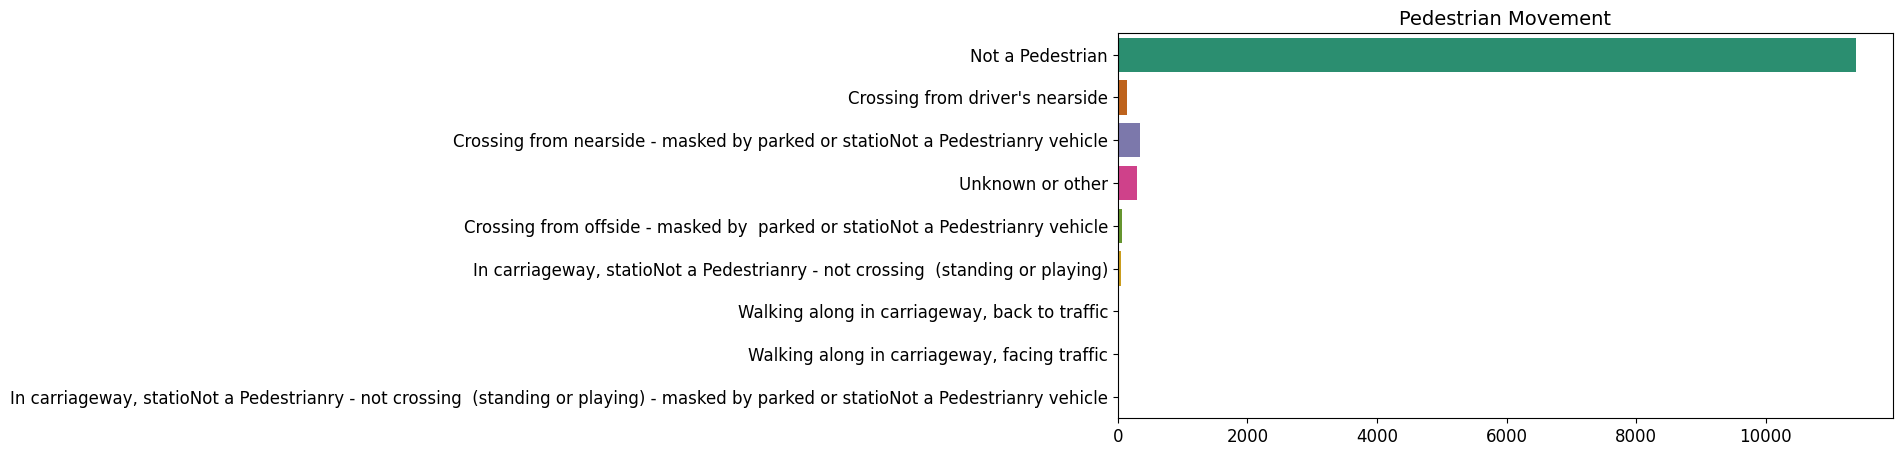

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=raw_df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

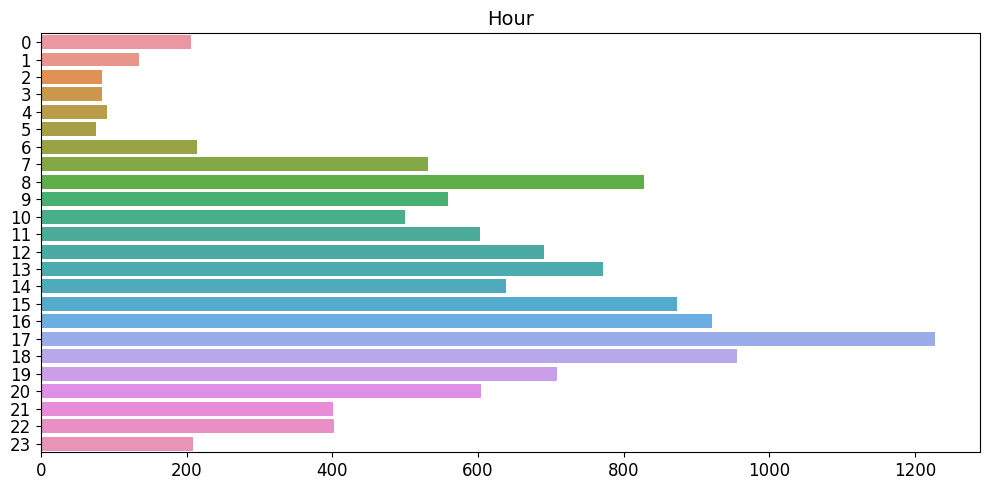

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=raw_df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

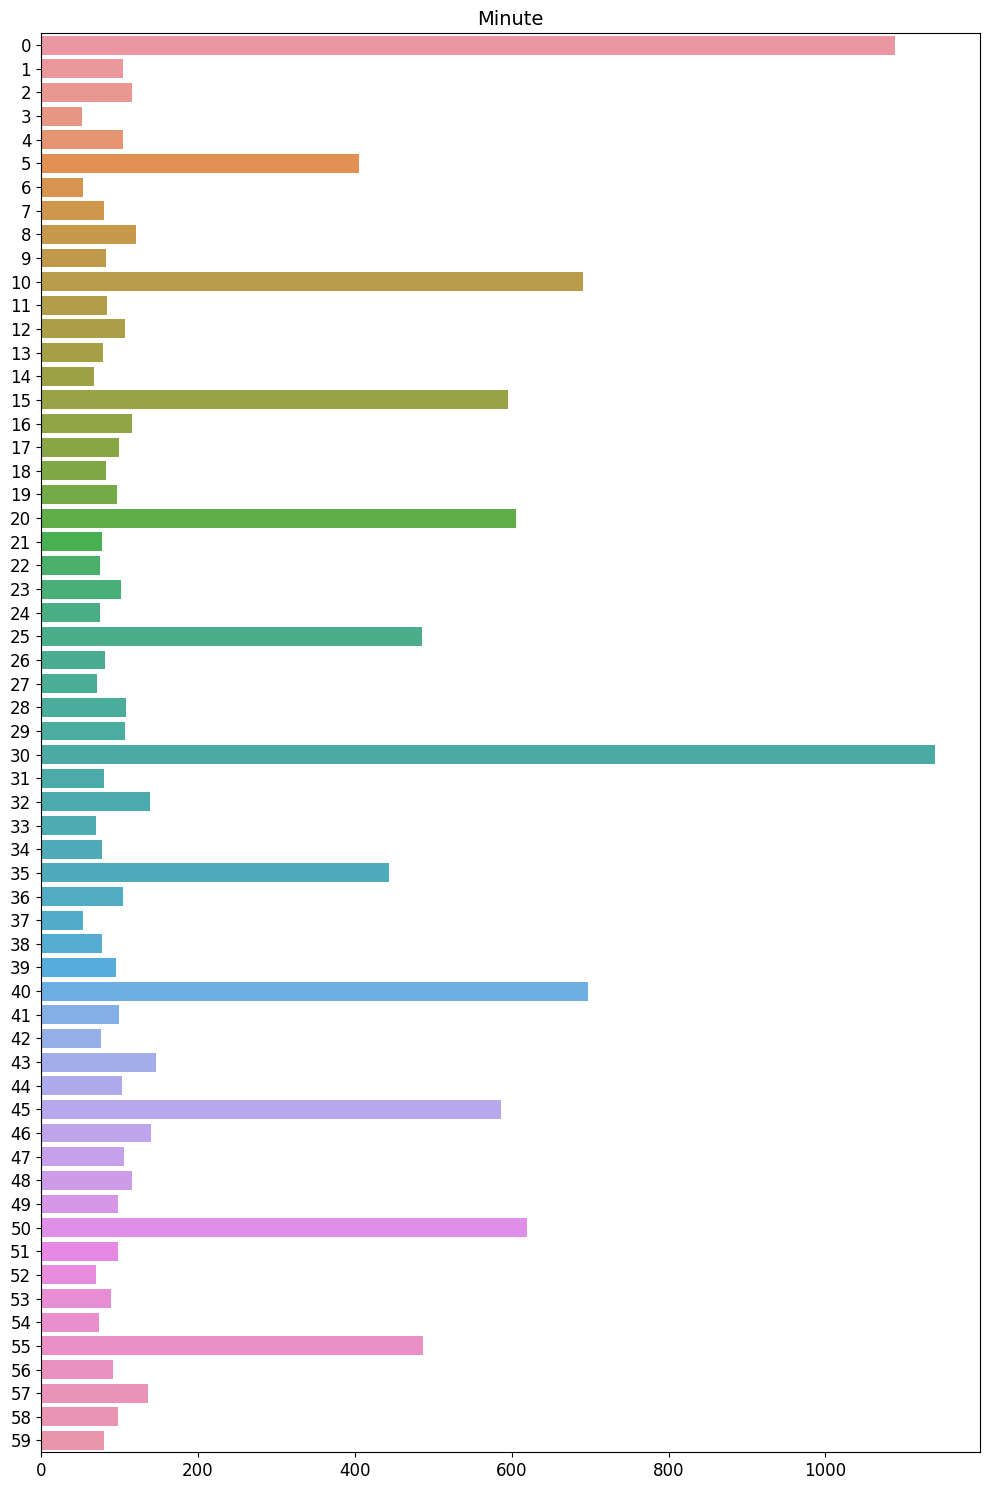

In [25]:
plt.figure(figsize=(10,15))
sns.countplot(data=raw_df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [26]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [27]:
raw_df['minute'] = raw_df['minute'].apply(lambda x: convert_minutes(x))

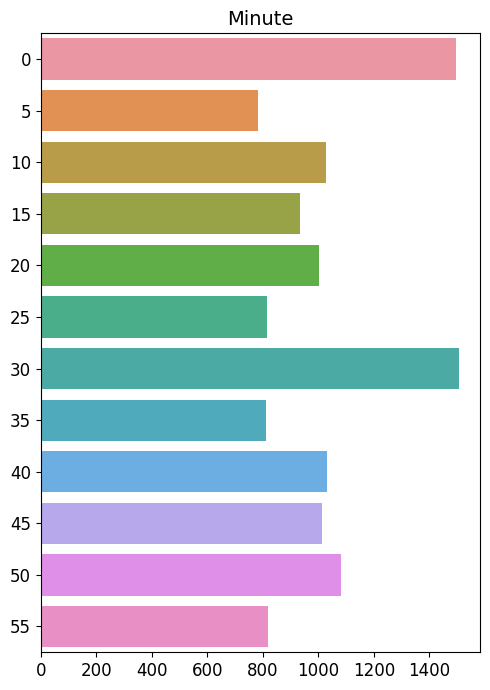

In [28]:
plt.figure(figsize=(5,7))
sns.countplot(data=raw_df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

# Hypothesis 1: Which of both genders is actually dangerous in Driving?
Calculating the Conditional Probability; Probability of an Accident Happen When the Driver is a Female and Repeating the Calculations when it's Male.
<br>
P(Gender = Male | Severity = 2) P(Gender = Female | Severity = 2)

In [29]:
hypothesis_df = raw_df.copy(deep=True)
((hypothesis_df.groupby(['driver_sex']).size() / hypothesis_df["driver_sex"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

driver_sex
Accidents(in %) Caused by Female      5.691783
Accidents(in %) Caused by Male       92.862943
Accidents(in %) Caused by Unknown     1.445274
dtype: float64

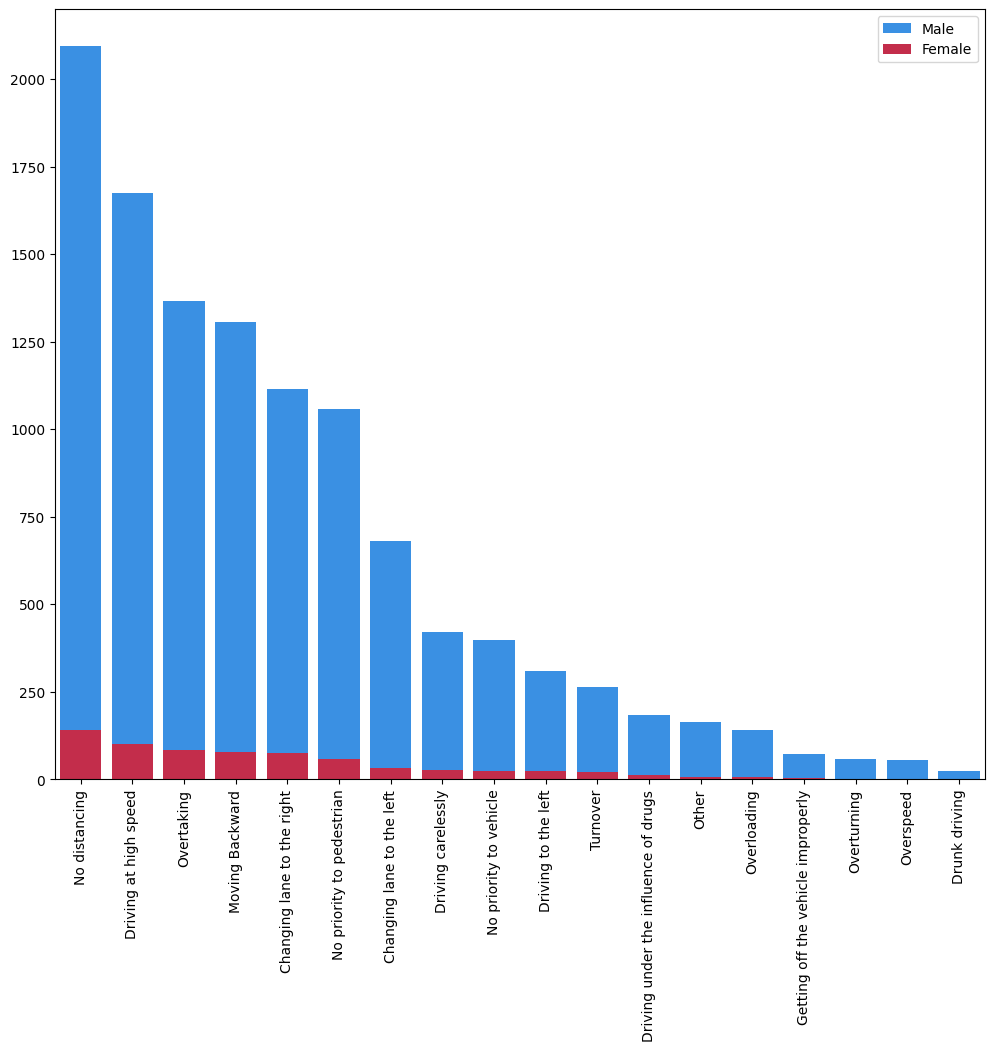

In [30]:
plt.figure(figsize=(12,10))
male_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Male']
female_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Female']
sns.barplot(data=male_df,x = male_df.accident_cause.unique(),y = male_df.accident_cause.value_counts().values,color='dodgerblue', label="Male")
sns.barplot(data=female_df,x = female_df.accident_cause.unique(),y = female_df.accident_cause.value_counts().values,color='crimson', label="Female")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [31]:
ff = pd.crosstab(index=hypothesis_df['driver_sex'].loc[hypothesis_df['driver_sex'] !="Unknown"], columns=raw_df['accident_severity']
                 , margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
driver_sex,,,,
Female,5,104,592,701
Male,152,1621,9664,11437
All,157,1725,10256,12138


In [32]:
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,0])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,0])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((ff.iloc[0,1])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((ff.iloc[1,1])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%


# Hypothesis 2: Is Speeding the main Cause for Car Crashes?

In [33]:
ff = pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
accident_cause,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


In [34]:
print(f'Injuries(all types due to speeding): {ff.iloc[2,2]}/{ff.iloc[3,3]}')
print(f'In percentage: {(ff.iloc[2,2]/ff.iloc[3,3])*100} %')

Injuries(all types due to speeding): 141/1402
In percentage: 10.057061340941512 %


# Hypothesis 3: Do weekends account for more accidents?

In [35]:
ff = pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
day_of_week,,,,
Friday,16,313,1712,2041
Monday,12,204,1465,1681
Saturday,37,245,1384,1666
Sunday,35,190,1242,1467
Thursday,22,272,1557,1851
Tuesday,17,257,1496,1770
Wednesday,19,262,1559,1840
All,158,1743,10415,12316


In [36]:
print('Accident percentage on weekdays:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] not in ['Saturday','Sunday']])/ff.iloc[7,3],2))
print('Accident percentage on weekends:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] in ['Saturday','Sunday']])/ff.iloc[7,3],2))

Accident percentage on weekdays: 0.75
Accident percentage on weekends: 0.25


# Hypothesis 4: Are there more dangerous injuries at night than in day?

In [37]:
ff = pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
light_condition,,,,
Darkness - lights lit,66,465,2755,3286
Darkness - lights unlit,0,7,33,40
Darkness - no lighting,5,49,138,192
Daylight,87,1222,7489,8798
All,158,1743,10415,12316


In [38]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += ff.iloc[j,i]

r = sol/(sum(ff.iloc[i,3] for i in [0,1,2]))
print('Dangerous injuries at night:',round(r,2),'%')
r = sum(ff.iloc[i,2] for i in [0,1,2])/sum(ff.iloc[i,3] for i in [0,1,2])
print('Slight injuries at night:',round(r,2),'%')

Dangerous injuries at night: 0.17 %
Slight injuries at night: 0.83 %


In [39]:
r = sum(ff.iloc[3,i] for i in [0,1])/ff.iloc[3,3]
print('Dangerous injuries at day:',round(r,2),'%')
r = ff.iloc[3,2]/ff.iloc[3,3]
print('Slight injuries at day:',round(r,2),'%')

Dangerous injuries at day: 0.15 %
Slight injuries at day: 0.85 %


# Hypothesis 5: More accidents under some specific non-normal weather?

In [40]:
ff = pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'], margins=True)
ff.drop(['Normal','All'],axis=0)

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
weather_condition,,,,
Cloudy,0,8,117,125
Fog or mist,0,1,9,10
Other,0,28,268,296
Raining,23,158,1150,1331
Raining and Windy,0,2,38,40
Snow,0,5,56,61
Unknown,0,51,241,292
Windy,0,16,82,98


# Preprocessing

In [41]:
import pandas as pd

def drop_null_cols(df: pd.DataFrame, threshold: int) -> pd.DataFrame:
    """
    Drops columns from a dataframe that have null value count greater than the threshold.
    
    Parameters:
    df (pandas.DataFrame): The input dataframe.
    threshold (int): The maximum allowed null value count for a column.
    
    Returns:
    pandas.DataFrame: The modified dataframe with dropped columns.
    """
    # get the null value count for each column
    null_counts = df.isnull().sum()
    
    # get the column names where null value count is greater than the threshold
    cols_to_drop = null_counts[null_counts > threshold].index.tolist()
    
    # drop the columns and return the modified dataframe
    return df.drop(cols_to_drop, axis=1)


In [42]:
df = drop_null_cols(raw_df, 2000)

In [43]:
df.shape

(12316, 29)

In [44]:
def ordinal_encoder(df: pd.DataFrame, feats: pd.DataFrame.columns) -> pd.DataFrame:
    """
    Perform Ordinal Encoder to the dataset

    Parameters
    ----------
    df: pd.DataFrame
        The dataframe to perform the ordinal encoder on.

    feats: pd.DataFrame.columns
        The columns to perform the ordinal encoder on.

    Returns
    -------
    df: pd.DataFrame
        The dataframe with the ordinal encoded columns.
    """
    for feat in feats:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

In [45]:
df = ordinal_encoder(df, df.columns)
df.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1,0,1,0.0,0.0,0.0,0.0,3.0,9.0,NaN,5.0,1.0,0.0,0,3,2,3.0,1,1,2.0,3,2,5,3,5,9,2,17,1
1,1,1,1,4.0,0.0,3.0,11.0,3.0,6.0,4.0,5.0,1.0,0.0,0,3,2,8.0,1,1,2.0,3,2,5,3,5,16,2,17,1
2,1,0,1,4.0,0.0,0.0,5.0,3.0,1.0,6.0,NaN,1.0,0.0,0,3,2,2.0,1,1,2.0,0,1,1,2,5,0,1,17,1
3,3,0,1,4.0,0.0,2.0,11.0,0.0,6.0,6.0,6.0,7.0,2.0,0,0,2,8.0,1,1,2.0,2,0,0,2,5,1,2,1,2
4,3,0,1,4.0,0.0,1.0,NaN,3.0,4.0,6.0,5.0,7.0,0.0,0,0,2,8.0,1,1,2.0,3,2,5,3,5,16,2,1,2


In [46]:
def knn_impute(df: pd.DataFrame) -> pd.DataFrame:
    """
    Impute the null values using KNN Imputer.

    Parameters
    ----------
    df: pd.DataFrame
        The dataframe to impute the null values of.

    Returns
    -------
    df: pd.DataFrame
        The dataframe with the imputed null values.
    """
    # Create a KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=5)
    # Fit the KNN Imputer
    df_imputed = knn_imputer.fit_transform(df)
    # Return the imputed dataframe
    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
    return df_imputed

In [47]:
df = knn_impute(df)

In [48]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,9.0,3.6,5.0,1.0,0.0,0.0,3.0,2.0,3.0,1.0,1.0,2.0,3.0,2.0,5.0,3.0,5.0,9.0,2.0,17.0,1.0
1,1.0,1.0,1.0,4.0,0.0,3.0,11.0,3.0,6.0,4.0,5.0,1.0,0.0,0.0,3.0,2.0,8.0,1.0,1.0,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,17.0,1.0
2,1.0,0.0,1.0,4.0,0.0,0.0,5.0,3.0,1.0,6.0,5.4,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,5.0,0.0,1.0,17.0,1.0
3,3.0,0.0,1.0,4.0,0.0,2.0,11.0,0.0,6.0,6.0,6.0,7.0,2.0,0.0,0.0,2.0,8.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,5.0,1.0,2.0,1.0,2.0
4,3.0,0.0,1.0,4.0,0.0,1.0,7.4,3.0,4.0,6.0,5.0,7.0,0.0,0.0,0.0,2.0,8.0,1.0,1.0,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,1.0,2.0


<Axes: >

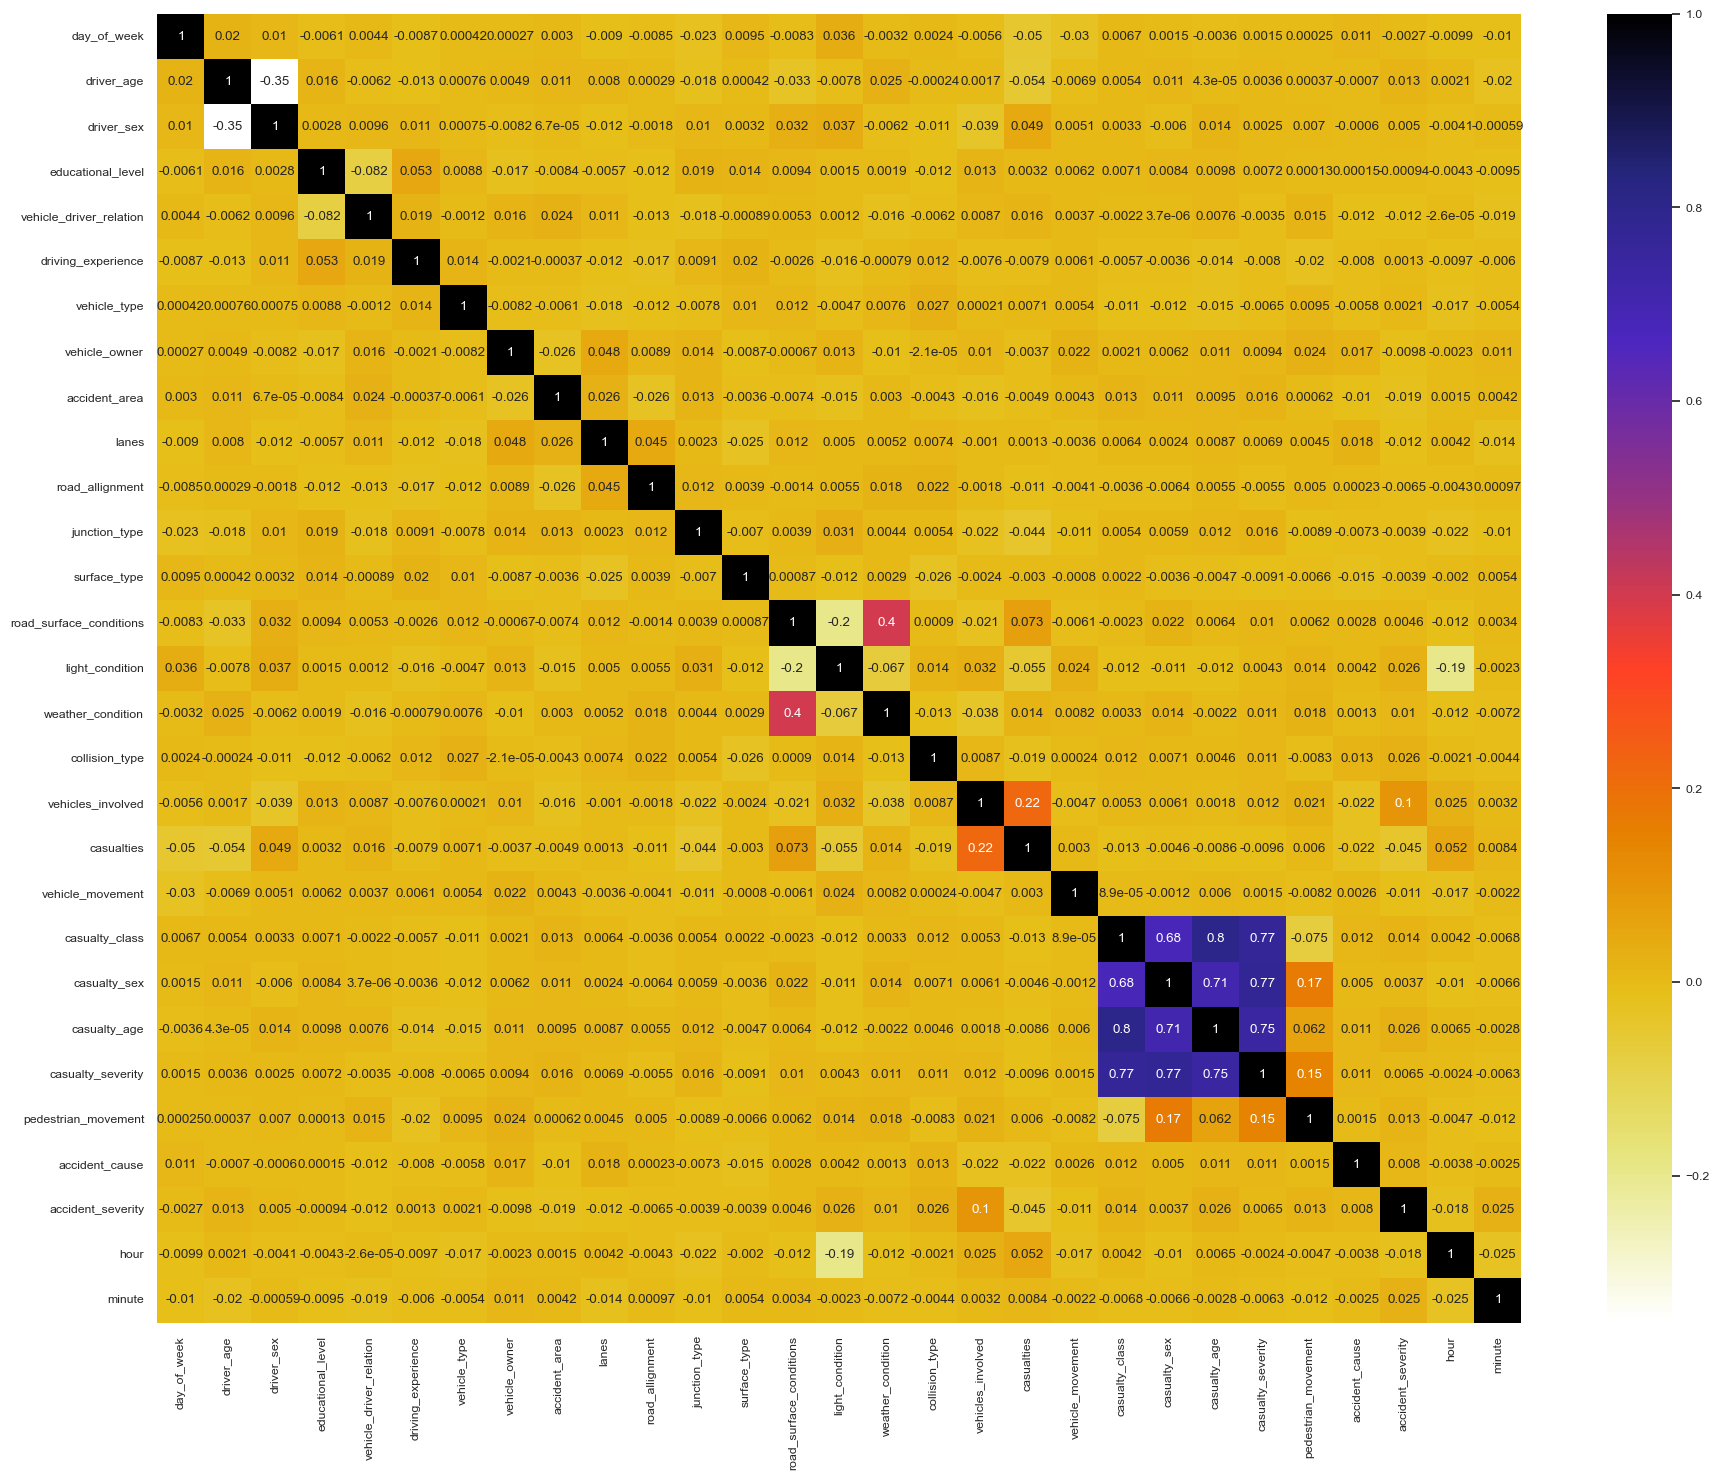

In [49]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Resampling

In [50]:
def smote_upsample(X_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Upsample the minority class using SMOTE.

    Parameters
    ----------
    X_train: numpy.ndarray
        The feature matrix of the training data.

    y_train: numpy.ndarray
        The target vector of the training data.

    Returns
    -------
    tuple of numpy.ndarray
        The upsampled feature matrix and target vector.
    """

    # Print class distribution before upsampling
    print("=============================")
    counter = Counter(y_train)
    for k,v in counter.items():
        per = 100*v/len(y_train)
        print(f"Class= {k}, n={v} ({per:.2f}%)")

    # Perform SMOTE upsampling
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    # Print class distribution after upsampling
    print("=============================")
    counter = Counter(y_train)
    for k,v in counter.items():
        per = 100*v/len(y_train)
        print(f"Class= {k}, n={v} ({per:.2f}%)")
    print("=============================")

    print("Upsampled data shape: ", X_train.shape, y_train.shape)

    return X_train, y_train

In [51]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [52]:
X_train, y_train = smote_upsample(X_train, y_train)

Class= 2.0, n=7324 (84.96%)
Class= 1.0, n=1191 (13.82%)
Class= 0.0, n=106 (1.23%)
Class= 2.0, n=7324 (33.33%)
Class= 1.0, n=7324 (33.33%)
Class= 0.0, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


# Baseline Modelling

In [53]:
def train_and_evaluate_multiple_models(X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series, models: list[str], metrics: list[str] = ["accuracy"], average: str = "weighted") -> dict[str, dict[str, float]]:
    """
    Train and evaluate multiple classifiers on the given data.

    Parameters
    ----------
    X_train: pd.DataFrame
        The features for the training data.

    y_train: pd.Series
        The target variable for the training data.

    X_test: pd.DataFrame
        The features for the testing data.

    y_test: pd.Series
        The target variable for the testing data.

    models: list[str]
        A list of classifiers to use, can include 'XGBoost', 'Random Forest', 'Extra Trees', 'Adaboost'.
        
    metrics: list[str], optional, default: ["accuracy"]
        The evaluation metrics to use, can include 'accuracy', 'precision', 'f1', and 'recall'.

    average: str, optional, default: "weighted"
        The averaging method for multiclass targets, one of [None, 'micro', 'macro', 'weighted'].
    
    Returns
    -------
    results: dict[str, dict[str, float]]
        A dictionary with the model names as keys, then a nested dictionary with metrics as key and the value of the metric as the value.
    """
    model_dict = {
        "XGBoost": XGBClassifier,
        "Random Forest": RandomForestClassifier,
        "Extra Trees": ExtraTreesClassifier,
        "Adaboost": AdaBoostClassifier
    }
    
    metric_dict = {
        "accuracy": accuracy_score,
        "precision": lambda y_true, y_pred: precision_score(y_true, y_pred, average=average),
        "f1": lambda y_true, y_pred: f1_score(y_true, y_pred, average=average),
        "recall": lambda y_true, y_pred: recall_score(y_true, y_pred, average=average)
    }
    
    num_classes = len(y_train.unique())

    results = {}
    for model in models:
        if model not in model_dict:
            raise ValueError(f"Invalid model name: {model}. Must be one of: {list(model_dict.keys())}")

        if model == "XGBoost":
            classifier = model_dict[model](objective='multi:softprob', num_class=num_classes)
        else:
            classifier = model_dict[model]()
        
        logging.info(f"Training {model}...")
        start_time = time.time()
        classifier.fit(X_train, y_train)
        train_time = time.time() - start_time

        logging.info(f"Predicting with {model}...")
        start_time = time.time()
        y_pred = classifier.predict(X_test)
        predict_time = time.time() - start_time
        
        model_results = {
            "train_time": train_time,
            "predict_time": predict_time
        }
        for metric in metrics:
            if metric not in metric_dict:
                raise ValueError(f"Invalid metric name: {metric}. Must be one of: {list(metric_dict.keys())}")
            model_results[metric] = metric_dict[metric](y_test, y_pred)
        
        results[model] = model_results
        logging.info(f"{model} evaluation complete.\n")

    return results

In [54]:
models = ["XGBoost", "Random Forest"]
metrics = ["accuracy", "precision", "f1", "recall"]

results = train_and_evaluate_multiple_models(X_train, y_train, X_test, y_test, models, metrics)

print(results)

2023-04-17 19:23:23,425 - INFO - Training XGBoost...
2023-04-17 19:23:27,491 - INFO - Predicting with XGBoost...
2023-04-17 19:23:27,502 - INFO - XGBoost evaluation complete.

2023-04-17 19:23:27,503 - INFO - Training Random Forest...
2023-04-17 19:23:30,899 - INFO - Predicting with Random Forest...
2023-04-17 19:23:30,955 - INFO - Random Forest evaluation complete.



{'XGBoost': {'train_time': 4.065798997879028, 'predict_time': 0.006555318832397461, 'accuracy': 0.8373477672530446, 'precision': 0.792113172213178, 'f1': 0.7890016928805426, 'recall': 0.8373477672530446}, 'Random Forest': {'train_time': 3.39559006690979, 'predict_time': 0.051853179931640625, 'accuracy': 0.8370771312584574, 'precision': 0.7809021760451094, 'f1': 0.7773004454483121, 'recall': 0.8370771312584574}}


In [74]:
def model_performance_report(model, y_test: pd.Series, y_pred: pd.Series) -> None:
    """
    Visualize model performance using a confusion matrix and metrics.

    Parameters
    ----------
    model: estimator instance
        The classifier model instance.
        
    y_test: pd.Series
        The true target variable for the testing data.

    y_pred: pd.Series
        The predicted target variable for the testing data.
    """
    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z=conf_matrix,
                        x=["0 (pred)", "1 (pred)", "2 (pred)"],
                        y=["0 (true)", "1 (true)", "2 (true)"],
                        xgap=2, ygap=2,
                        colorscale='Viridis', showscale=False)

    # Calculate metrics
    Accuracy = accuracy_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred, average='weighted')
    Recall = recall_score(y_test, y_pred, average='weighted')
    F1_score = f1_score(y_test, y_pred, average='weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy, Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x=show_metrics[0].values,
                    y=['Accuracy', 'Precision', 'Recall', 'F1_score'],
                    text=np.round_(show_metrics[0].values, 4),
                    textposition='auto',
                    orientation='h', opacity=0.8,
                    marker=dict(
                        color=colors,
                        line=dict(color='#000000', width=1.5)))

    # Create subplots
    fig = sp.make_subplots(rows=2, cols=1, print_grid=False,
                           subplot_titles=('Confusion Matrix',
                                           'Metrics',
                                           ))

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 2, 1)

    fig.update_layout(showlegend=False,
                      title='<b>Model performance report</b><br>' + str(model),
                      autosize=True, height=800, width=800,
                      plot_bgcolor='rgba(240,240,240, 0.95)',
                      paper_bgcolor='rgba(240,240,240, 0.95)',
                      )
    fig.layout.titlefont.size = 14

    pio.show(fig, filename='model-performance')

In [56]:
# Train a model and get predictions
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Call the model_performance_report function
model_performance_report(model, y_test, y_pred)

# Hyperparameter Tuning

In [61]:
def tune_hyperparameters(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    models: list[str] = ["XGBoost", "Random Forest", "Extra Trees", "Adaboost"],
    scoring: str = "accuracy",
    cv_type: str = "KFold",
    n_splits: int = 5,
    tuning_type: str = "GridSearchCV",
    xgb_params: dict = None,
    rf_params: dict = None,
    et_params: dict = None,
    ab_params: dict = None,
) -> dict[str, dict[str, float]]:
    """
    Automatically perform hyperparameter tuning for the selected models.

    Parameters
    ----------
    X_train: pd.DataFrame
        The features for the training data.

    y_train: pd.Series
        The target variable for the training data.

    models: list[str], optional, default: ["XGBoost", "Random Forest", "Extra Trees", "Adaboost"]
        A list of classifiers to use, can include 'XGBoost', 'Random Forest', 'Extra Trees', 'Adaboost'.

    scoring: str, optional, default: "accuracy"
        The scoring metric to be used for hyperparameter tuning.

    cv_type: str, optional, default: "KFold"
        The type of cross-validation to use, one of ["KFold", "StratifiedKFold"].

    tuning_type: str, optional, default: "GridSearchCV"
        The type of hyperparameter tuning to use, one of ["GridSearchCV", "RandomizedSearchCV"].

    xgb_params: dict, optional
        A dictionary of hyperparameters for the XGBoost model.

    rf_params: dict, optional
        A dictionary of hyperparameters for the Random Forest model.

    et_params: dict, optional
        A dictionary of hyperparameters for the Extra Trees model.

    ab_params: dict, optional
        A dictionary of hyperparameters for the Adaboost model.

    Returns
    -------
    results: dict[str, dict[str, float]]
        A dictionary with the model names as keys, then a nested dictionary with the keys 'best_params_' and 'best_score_' and their corresponding values as the values.
    """
    model_dict = {
        "XGBoost": XGBClassifier,
        "Random Forest": RandomForestClassifier,
        "Extra Trees": ExtraTreesClassifier,
        "Adaboost": AdaBoostClassifier,
    }

    param_dict = {
        "XGBoost": xgb_params,
        "Random Forest": rf_params,
        "Extra Trees": et_params,
        "Adaboost": ab_params,
    }

    if cv_type == "KFold":
        cv = KFold(n_splits=n_splits)
    elif cv_type == "StratifiedKFold":
        cv = StratifiedKFold(n_splits=n_splits)
    else:
        raise ValueError(f"Invalid cv_type: {cv_type}. Must be one of: ['KFold', 'StratifiedKFold']")

    if tuning_type == "GridSearchCV":
        tuning_function = GridSearchCV
    elif tuning_type == "RandomizedSearchCV":
        tuning_function = RandomizedSearchCV
    else:
        raise ValueError(f"Invalid tuning_type: {tuning_type}. Must be one of: ['GridSearchCV', 'RandomizedSearchCV']")

    results = {}
    for model in models:
        if model not in model_dict:
            raise ValueError(f"Invalid model name: {model}. Must be one of: {list(model_dict.keys())}")

        classifier = model_dict[model]()
        params = param_dict[model]

        if params is None:
            raise ValueError(f"Hyperparameters for {model} are not provided. Please provide a dictionary of hyperparameters for the model.")

        tuner = tuning_function(classifier, params, scoring=scoring, cv=cv)

        total_candidates = len(list(ParameterGrid(params)))
        total_fits = n_splits * total_candidates
        logging.info(f"Fitting {n_splits} folds for each of {total_candidates} candidates, totalling {total_fits} fits")

        logging.info(f"Tuning hyperparameters for {model}...")
        start_time = time.time()
        tuner.fit(X_train, y_train)
        tuning_time = time.time() - start_time

        model_results = {
            "best_params_": tuner.best_params_,
            "best_score_": tuner.best_score_,
            "tuning_time": tuning_time
        }

        results[model] = model_results
        logging.info(f"Hyperparameter tuning for {model} complete.\n")

    return results

In [63]:
et_params = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "random_state": [42]
}

rf_params = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "random_state": [42]
}

results = tune_hyperparameters(
    X_train,
    y_train,
    models=["Extra Trees", "Random Forest"],
    scoring="f1_weighted",
    n_splits=3,
    et_params=et_params,
    rf_params=rf_params
)

print(results)

2023-04-17 19:26:04,887 - INFO - Fitting 3 folds for each of 81 candidates, totalling 243 fits
2023-04-17 19:26:04,887 - INFO - Fitting 3 folds for each of 81 candidates, totalling 243 fits
2023-04-17 19:26:04,891 - INFO - Tuning hyperparameters for Extra Trees...
2023-04-17 19:26:04,891 - INFO - Tuning hyperparameters for Extra Trees...
2023-04-17 19:27:58,909 - INFO - Hyperparameter tuning for Extra Trees complete.

2023-04-17 19:27:58,909 - INFO - Hyperparameter tuning for Extra Trees complete.

2023-04-17 19:27:58,913 - INFO - Fitting 3 folds for each of 81 candidates, totalling 243 fits
2023-04-17 19:27:58,913 - INFO - Fitting 3 folds for each of 81 candidates, totalling 243 fits
2023-04-17 19:27:58,914 - INFO - Tuning hyperparameters for Random Forest...
2023-04-17 19:27:58,914 - INFO - Tuning hyperparameters for Random Forest...
2023-04-17 19:32:04,730 - INFO - Hyperparameter tuning for Random Forest complete.

2023-04-17 19:32:04,730 - INFO - Hyperparameter tuning for Random Fo

{'Extra Trees': {'best_params_': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}, 'best_score_': 0.6450553036658064, 'tuning_time': 114.01330995559692}, 'Random Forest': {'best_params_': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42}, 'best_score_': 0.6033442553018188, 'tuning_time': 245.81501603126526}}


In [64]:
print(results)

{'Extra Trees': {'best_params_': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}, 'best_score_': 0.6450553036658064, 'tuning_time': 114.01330995559692}, 'Random Forest': {'best_params_': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42}, 'best_score_': 0.6033442553018188, 'tuning_time': 245.81501603126526}}


In [81]:
models = ["XGBoost"]
metrics = ["f1"]
average = "weighted"

results = train_and_evaluate_multiple_models(X_train, y_train, X_test, y_test, models, metrics, average)

2023-04-17 20:42:16,576 - INFO - Training XGBoost...
2023-04-17 20:42:16,576 - INFO - Training XGBoost...
2023-04-17 20:42:20,365 - INFO - Predicting with XGBoost...
2023-04-17 20:42:20,365 - INFO - Predicting with XGBoost...
2023-04-17 20:42:20,374 - INFO - XGBoost evaluation complete.

2023-04-17 20:42:20,374 - INFO - XGBoost evaluation complete.



In [82]:
print(results)

{'XGBoost': {'train_time': 3.7815351486206055, 'predict_time': 0.005808115005493164, 'f1': 0.7890016928805426}}


In [76]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "n_estimators": [50, 100, 150],
    "subsample": [0.8, 1],
}

# Call the tune_hyperparameters function
results = tune_hyperparameters(
    X_train=X_train,
    y_train=y_train,
    models=["XGBoost"],
    scoring="f1_weighted",
    cv_type="KFold",
    tuning_type="GridSearchCV",
    xgb_params=xgb_params,
    rf_params=None,
    et_params=None,
    ab_params=None,
)

2023-04-17 20:29:54,713 - INFO - Fitting 5 folds for each of 54 candidates, totalling 270 fits
2023-04-17 20:29:54,713 - INFO - Fitting 5 folds for each of 54 candidates, totalling 270 fits
2023-04-17 20:29:54,716 - INFO - Tuning hyperparameters for XGBoost...
2023-04-17 20:29:54,716 - INFO - Tuning hyperparameters for XGBoost...
2023-04-17 20:40:51,466 - INFO - Hyperparameter tuning for XGBoost complete.

2023-04-17 20:40:51,466 - INFO - Hyperparameter tuning for XGBoost complete.



In [77]:
print(results)

{'XGBoost': {'best_params_': {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}, 'best_score_': 0.926792669874257, 'tuning_time': 656.7496666908264}}


In [78]:
best_params = results["XGBoost"]["best_params_"]

In [79]:
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [80]:
y_pred = best_xgb.predict(X_test)
model_performance_report(best_xgb, y_test, y_pred)